In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df = pd.read_csv('/content/drive/MyDrive/car data.csv')


In [92]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data = df.copy()

In [17]:
df['Selling_Price'].value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

In [18]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [67]:
df['Transmission'].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [93]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [69]:
df['Fuel_Type'].value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [94]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

In [71]:
df['Selling_type'].value_counts()

0    195
1    106
Name: Selling_type, dtype: int64

In [95]:
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)

In [112]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<ipython-input-73-881ed5755e54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

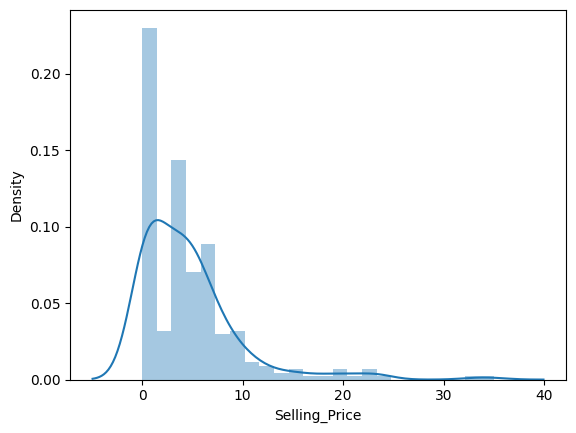

In [73]:
sns.distplot(df['Selling_Price'])

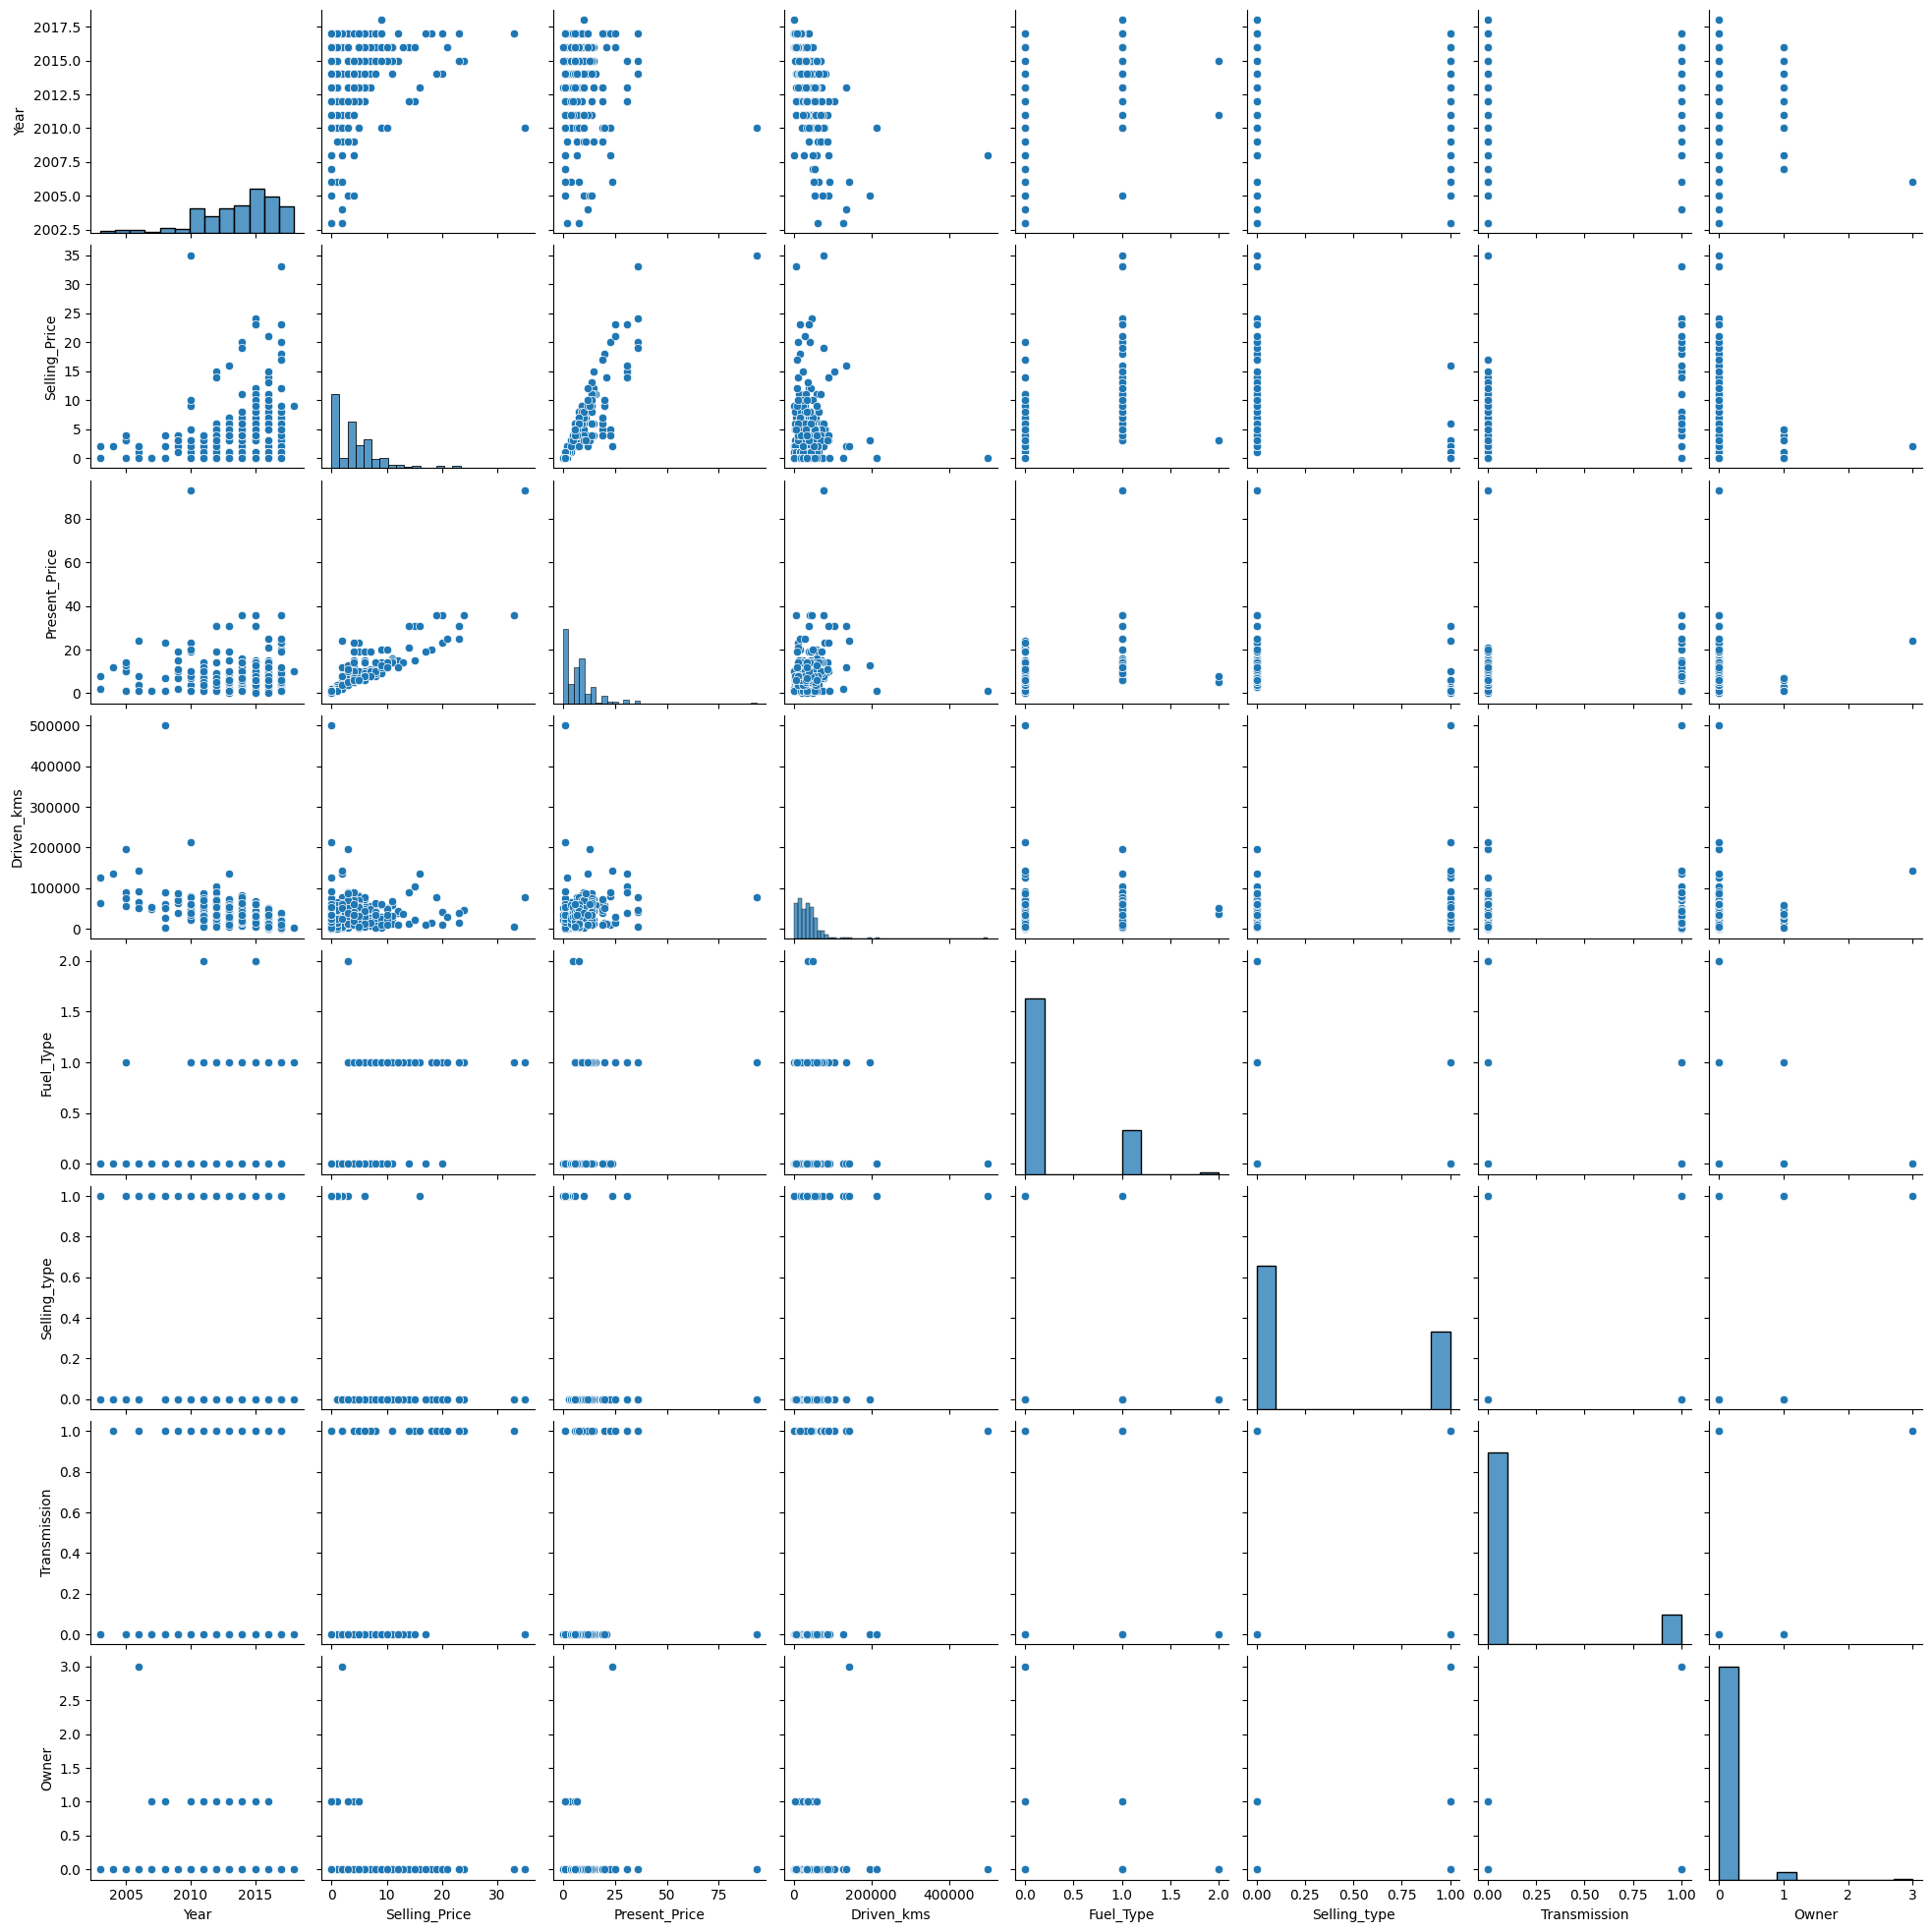

In [74]:
sns.pairplot(df)

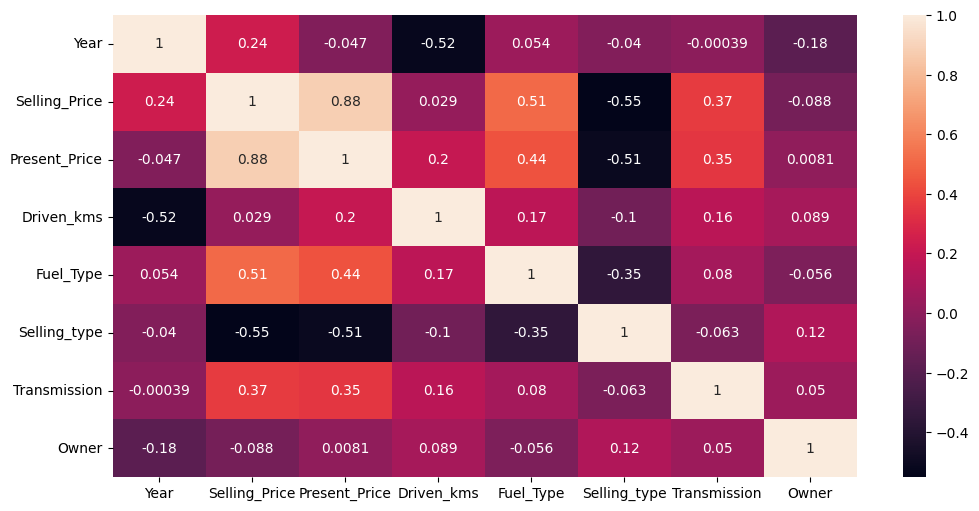

In [108]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [96]:
y = df['Selling_Price']
X = X =df.drop(['Car_Name','Selling_Price'],axis =1)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=2 )

In [78]:
!pip install xgboost

In [47]:
from xgboost import XGBRegressor

In [98]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [99]:
models = {"a" :["LinearRegression",lr],
 "b": ["SVR", svr],
 "c": ["SGDRegressor", sgdr],
 "d": ["KNeighborsRegressor",knr],
 "e": ["GaussianProcessRegressor" , gpr],
 "f": ["DecisionTreeRegressor", dtr],
 "g": ["GradientBoostingRegressor",gbr],
 "h": ["RandomForestRegressor" , rfr],
 "i": ["XGBRegressor", xgbr],
 "j": ["MLPRegressor", mlpr],
          "k": ["IsotonicRegression", ir]
}

In [100]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

In [101]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer , r2_score

def test_model(model, x_train = x_train, y_train = y_train):
  cv = KFold(n_splits= 7, shuffle = True, random_state = 45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring = r2)
  score = [r2_val_score.mean()]
  return score

In [102]:
models_score = []
for model in models:
  print("Training model: ", models[model][0])
  score = test_model(models[model][1],x_train , y_train)
  print("Score of model :", score)
  models_score.append([models[model][0], score[0]])

Training model:  LinearRegression
Score of model : [0.8299190265180344]
Training model:  SVR
Score of model : [-0.11761090799304487]
Training model:  SGDRegressor
Score of model : [-2.664362225021472e+35]
Training model:  KNeighborsRegressor
Score of model : [-0.13752077579484803]
Training model:  GaussianProcessRegressor
Score of model : [-0.9490933429084707]
Training model:  DecisionTreeRegressor
Score of model : [0.829584837169669]
Training model:  GradientBoostingRegressor
Score of model : [0.8945772577536876]
Training model:  RandomForestRegressor
Score of model : [0.9153832687244864]
Training model:  XGBRegressor
Score of model : [0.9276780437194132]
Training model:  MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score of model : [-30391.081173089984]
Training model:  IsotonicRegression


ValueError: ignored

In [103]:
models_score

[['LinearRegression', 0.8299190265180344],
 ['SVR', -0.11761090799304487],
 ['SGDRegressor', -2.664362225021472e+35],
 ['KNeighborsRegressor', -0.13752077579484803],
 ['GaussianProcessRegressor', -0.9490933429084707],
 ['DecisionTreeRegressor', 0.829584837169669],
 ['GradientBoostingRegressor', 0.8945772577536876],
 ['RandomForestRegressor', 0.9153832687244864],
 ['XGBRegressor', 0.9276780437194132],
 ['MLPRegressor', -30391.081173089984]]

In [104]:
max_score = max(models_score, key=lambda x: x[1])

print("Model with the highest score:", max_score[0])
print("Highest score:", max_score[1])

Model with the highest score: XGBRegressor
Highest score: 0.9276780437194132


In [105]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
training_data_prediction = xgbr.predict(x_train)

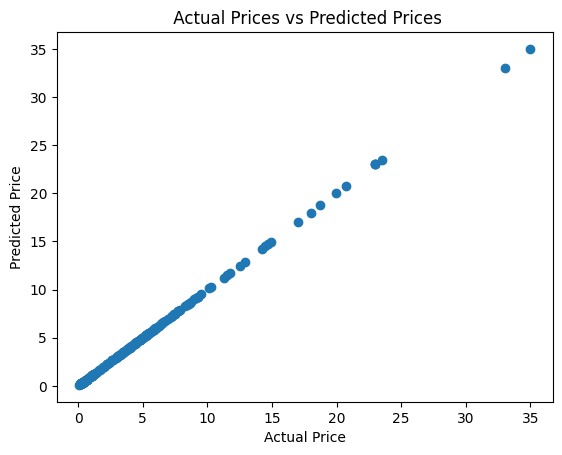

In [107]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()